In [1]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape, sgolay2d, interpolate_background, ring
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from scipy.ndimage.filters import gaussian_filter
#from scipy.ndimage import imread
#from scipy.ndimage.interpolation import rotate
%matplotlib notebook

In [2]:
x, y, z, T, t, settings = load_data("multi_separator_edge", range(1,11))
x = x[0]
y = y[0]
settings = settings[0]
settings

{'change_direction': False,
 'data_logger_channel': 101,
 'data_points': 169,
 'direction': ('x', 'y'),
 'extent': ((10.0, 27, 0.1), (14, 31, 0.1)),
 'mode': 'absolute',
 'sampling_time': 0.256,
 'sensors': ['1161']}

In [3]:
x_bg, y_bg, z_bg, T_bg, t_bg, settings_bg = load_data("background_full_0.1", [4])
x_bg = x_bg[0]
y_bg = y_bg[0]
background = interpolate_background(x_bg, y_bg, z_bg[0][0], x, y)
background = background.max() - background
settings_bg = settings_bg[0]

In [4]:
def logscale(x, a=1):
    return np.log(x - x.min() + 1) ** (1/a)

<IPython.core.display.Javascript object>


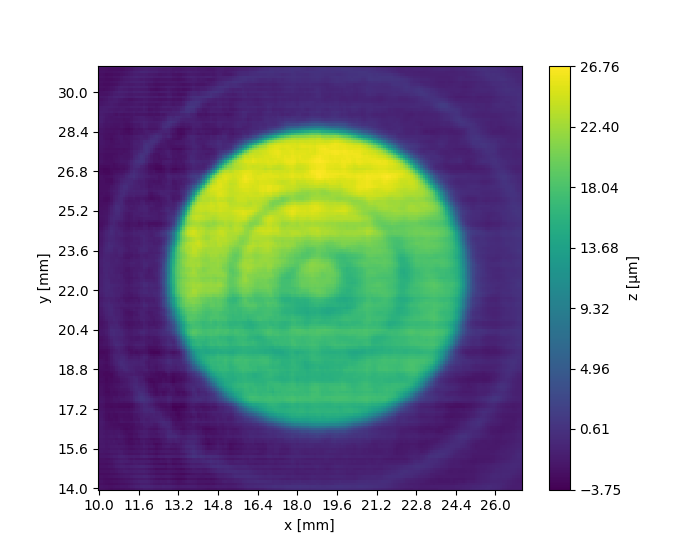

<IPython.core.display.Javascript object>


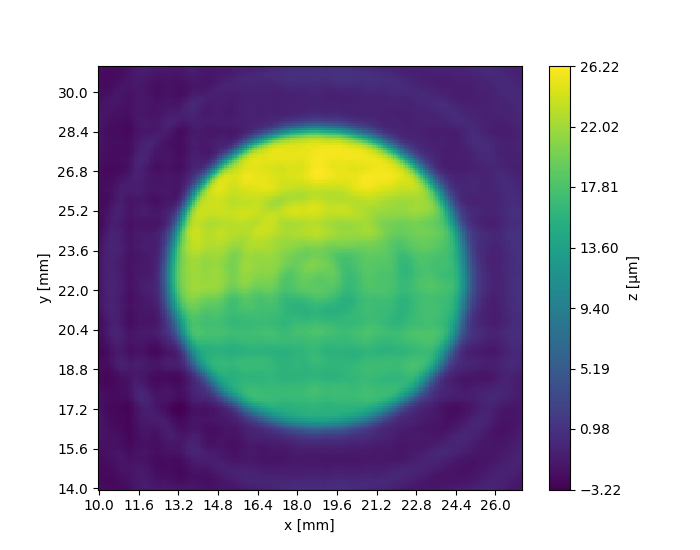

In [5]:
sensor = z[1][0].max() - z[1][0]
sensor1 = z[-1][0]
sensor2 = z[-2][0]
#background = z[13][0].max() - z[13][0]
#background2 = z[12][0].max() - z[12][0]
signal = sensor - background
signal_prefilter = gaussian_filter(signal, 2)
#noise = detrend2D(sensor1 - sensor2)
#plot(x, y, signal)
#plot(x, y, signal_prefilter)

#plot(x, y, signal)

#plot(x, y, noise)

diameter = 2.59
sigma = 0
stepsize = settings['extent'][0][2]


kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, 0.001, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed)
z_reconstructed_prefilter = wiener(signal_prefilter, kernel, 0.0003, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed_prefilter)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


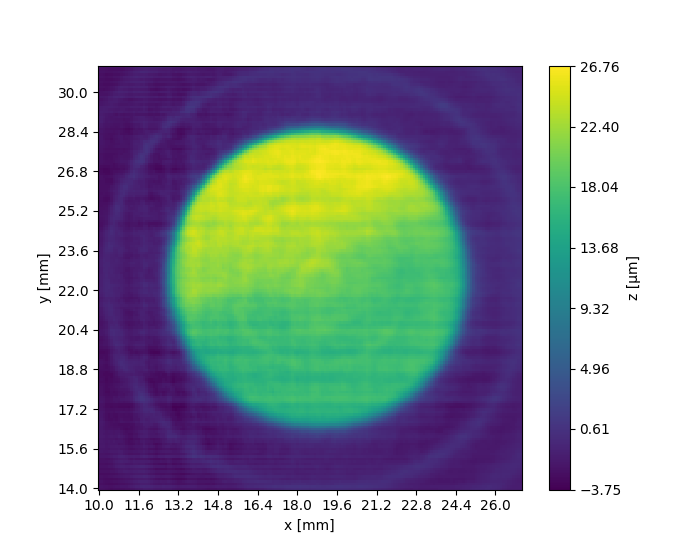

<IPython.core.display.Javascript object>


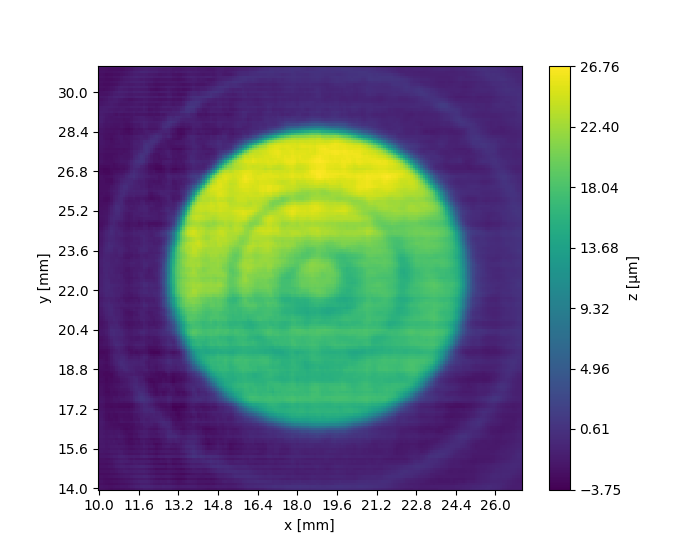

In [71]:
rin1 = ring(x, y, (18.9, 22.5), 3.4, 3.6, 2)
rin2 = ring(x, y, (18.95, 22.4), 0.7, 1.8, 2.5)
noring = z_reconstructed + rin1 * 5 + rin2 * 3
fig, ax = plot(x, y, noring)
plot(x, y, z_reconstructed)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


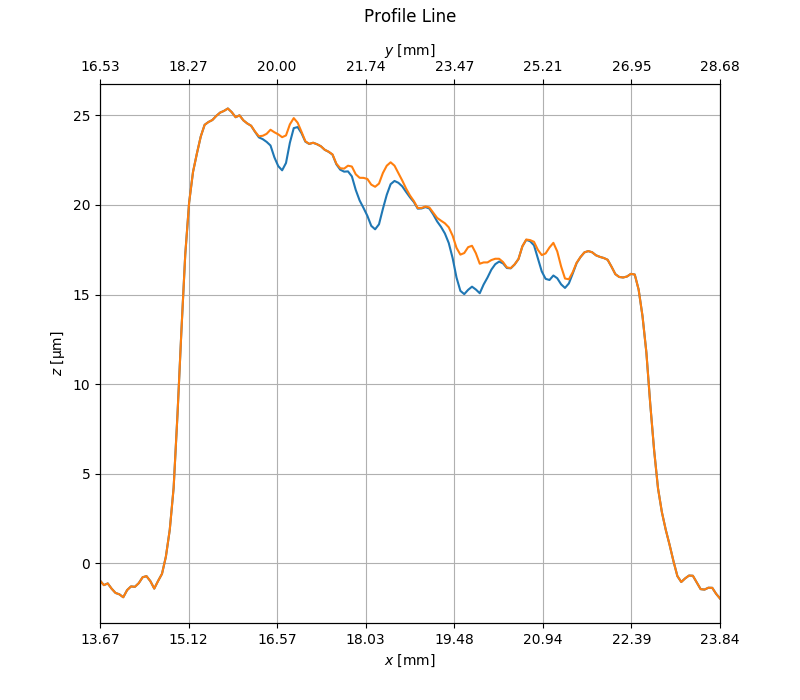

(<matplotlib.figure.Figure at 0x7f57d7d87a90>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f57d7b61390>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f57dc4cae80>))

In [59]:
plot_profile(x, y, [z_reconstructed, noring], *profile.coords)

In [6]:
rin = ring(x, y, (18, 22), 3, 2, 1)
plot(x, y, rin)